## 💄 Projeto: Análise de Atendimentos de um Salão de Beleza

### 1. Importação das bibliotecas
> Comente aqui quais bibliotecas você vai usar e por quê
> (ex: pandas para manipulação de dados, matplotlib e seaborn para visualização, etc.)

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from validador_dados import *

### 2. Leitura da base de dados
> Carregue o arquivo CSV e visualize as primeiras linhas para entender a estrutura dos dados
> Verifique também o tipo de cada coluna (.info()) e veja se há dados faltantes

In [49]:
df_salao = pd.read_csv(r'atendimentos_salao.csv')
display(df_salao.head())
df_salao.info()

,Data,Cliente,Profissional,Serviço,Valor,Forma de Pagamento
0,2025-03-20,Antônio Freitas,Carla,Escova,62.48,Dinheiro
1,2025-02-09,Daniel Cavalcanti,Lucas,Barba,29.31,Dinheiro
2,2025-03-23,Dra. Ana Laura Pereira,Carla,Coloração,123.24,Pix
3,2025-01-20,Bryan da Rosa,Carla,Coloração,127.62,Pix
4,2025-02-08,Maria Araújo,Lucas,Barba,28.83,Pix


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data                200 non-null    object 
 1   Cliente             200 non-null    object 
 2   Profissional        200 non-null    object 
 3   Serviço             200 non-null    object 
 4   Valor               200 non-null    float64
 5   Forma de Pagamento  200 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.5+ KB


### 3. Tratamento e preparação dos dados
> - Converta a coluna de data para o formato datetime
> - Crie colunas derivadas como “Dia da Semana” e “Mês”
> - Verifique se há valores inconsistentes ou duplicados

In [61]:
df_salao['Data'] = pd.to_datetime(df_salao['Data'])
df_salao['Dia'] = df_salao['Data'].dt.day_name(locale='pt_BR')
df_salao['Mes_Num'] = df_salao['Data'].dt.month
df_salao['Mes'] = df_salao['Data'].dt.month_name(locale='pt_BR')

display(df_salao)

,Data,Cliente,Profissional,Serviço,Valor,Forma de Pagamento,Dia,Mes,Mes_Num
0,2025-03-20,Antônio Freitas,Carla,Escova,62.48,Dinheiro,Quinta-feira,Março,3
1,2025-02-09,Daniel Cavalcanti,Lucas,Barba,29.31,Dinheiro,Domingo,Fevereiro,2
2,2025-03-23,Dra. Ana Laura Pereira,Carla,Coloração,123.24,Pix,Domingo,Março,3
3,2025-01-20,Bryan da Rosa,Carla,Coloração,127.62,Pix,Segunda-feira,Janeiro,1
4,2025-02-08,Maria Araújo,Lucas,Barba,28.83,Pix,Sábado,Fevereiro,2
...,...,...,...,...,...,...,...,...,...
195,2025-02-28,Dr. Thales da Costa,Carla,Corte Masculino,41.93,Dinheiro,Sexta-feira,Fevereiro,2
196,2025-02-28,Thomas Silveira,Lucas,Corte Masculino,35.58,Dinheiro,Sexta-feira,Fevereiro,2
197,2025-03-21,Paulo Teixeira,Lucas,Escova,60.77,Cartão,Sexta-feira,Março,3
198,2025-04-02,Letícia Pinto,Fernanda,Barba,30.29,Dinheiro,Quarta-feira,Abril,4


In [51]:
# chamando funçoes de validaçao
df_salao = remover_duplicados(df_salao)
verificar_nulos(df_salao)
verificar_valores_unicos(df_salao, ['Serviço', 'Profissional', 'Forma de Pagamento'])
outliers = verificar_outliers(df_salao)

🔁 Duplicados encontrados: 0

🔍 Verificando valores nulos:
✅ Nenhum valor nulo encontrado.

🔎 Verificando valores únicos por coluna:

Coluna: 'Serviço'
Total de categorias distintas: 6
Serviço
Corte Feminino     42
Escova             41
Corte Masculino    33
Coloração          31
Manicure           30
Barba              23
Name: count, dtype: int64

Coluna: 'Profissional'
Total de categorias distintas: 4
Profissional
Fernanda    54
Carla       50
Lucas       49
João        47
Name: count, dtype: int64

Coluna: 'Forma de Pagamento'
Total de categorias distintas: 3
Forma de Pagamento
Dinheiro    70
Pix         69
Cartão      61
Name: count, dtype: int64

📈 Verificando outliers na coluna 'Valor'...
Encontrados 0 outliers fora da faixa (10 a 300).


### 4. Análise Exploratória de Dados (EDA)

#### 4.1 Total de atendimentos e receita gerada
> Quantos atendimentos ocorreram no total? Qual foi o valor total faturado?

Faturamento total de: R$12139.29


,Mes,Valor
0,Abril,2153.79
1,Fevereiro,3552.31
2,Janeiro,1984.83
3,Março,4448.36


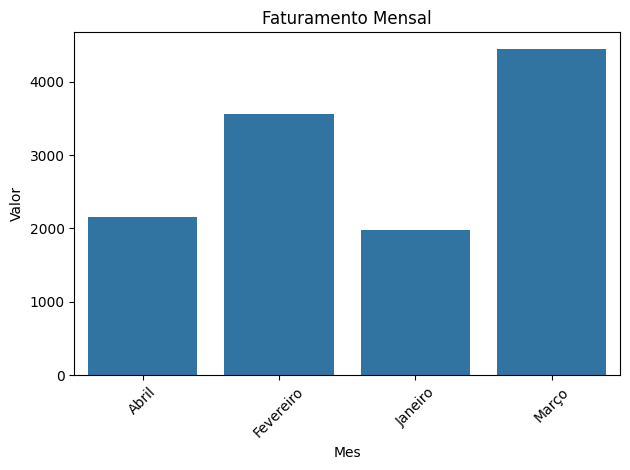

In [81]:
faturamento_total_df = df_salao['Valor'].sum()
print(f'Faturamento total de: R${faturamento_total_df}')

faturamento_mensal_df = df_salao.groupby('Mes')['Valor'].sum().reset_index()
display(faturamento_mensal_df)

sns.barplot(data=faturamento_mensal_df, x="Mes", y="Valor")
plt.title('Faturamento Mensal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 4.2 Serviços mais realizados
> Quais são os serviços mais populares? Mostre em ordem decrescente

,Serviço,Quantidade
0,Corte Feminino,42
1,Escova,41
2,Corte Masculino,33
3,Coloração,31
4,Manicure,30
5,Barba,23


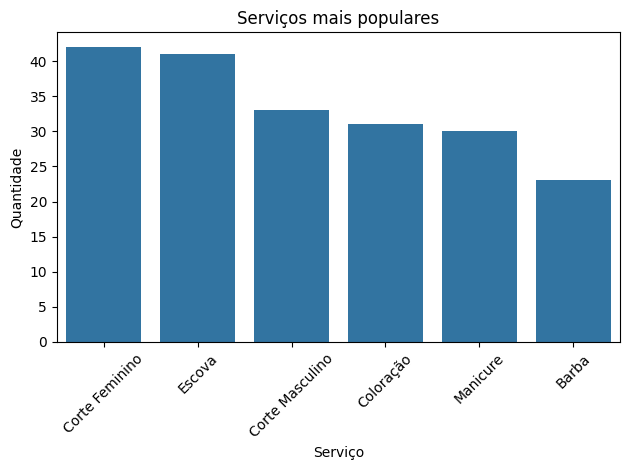

In [80]:
servicos_populares_df = df_salao['Serviço'].value_counts().reset_index()
servicos_populares_df.columns = ['Serviço', 'Quantidade']
display(servicos_populares_df)

sns.barplot(data=servicos_populares_df, x="Serviço", y="Quantidade")
plt.title('Serviços mais populares')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4.3 Receita por serviço
> Quais serviços geram mais receita, independentemente da quantidade?

,Serviço,Valor
1,Coloração,3739.55
2,Corte Feminino,2936.43
4,Escova,2453.45
3,Corte Masculino,1303.99
5,Manicure,1031.98
0,Barba,673.89


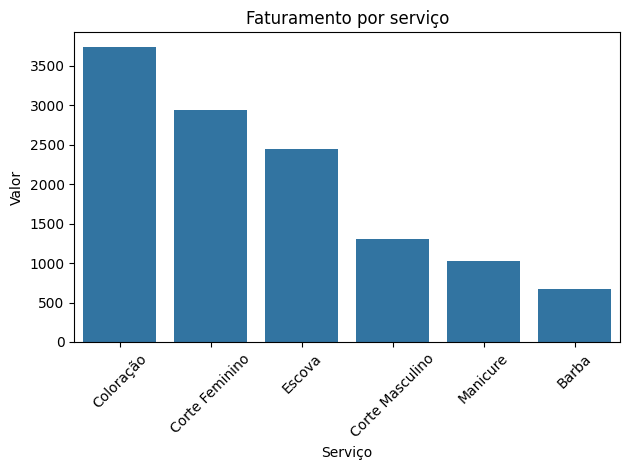

In [85]:
faturamento_servico_df = df_salao.groupby('Serviço')['Valor'].sum().reset_index()
faturamento_servico_df = faturamento_servico_df.sort_values(by='Valor', ascending=False)
display(faturamento_servico_df)

sns.barplot(data=faturamento_servico_df, x="Serviço", y="Valor")
plt.title('Faturamento por serviço')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4.4 Profissionais mais ativos
> Quais profissionais mais atenderam? Quem trouxe mais receita?

,Profissional,Quantidade
0,Fernanda,54
1,Carla,50
2,Lucas,49
3,João,47


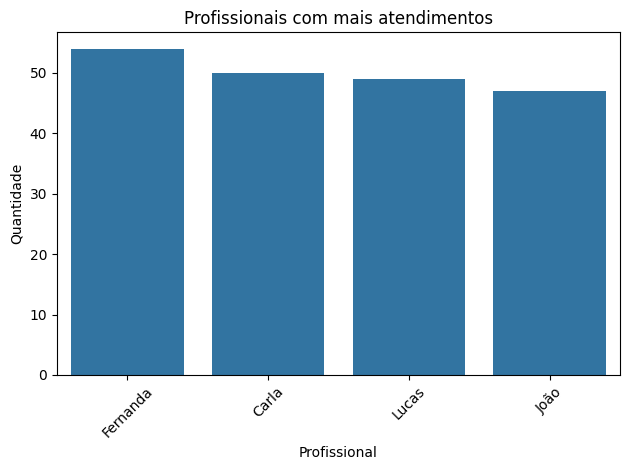

In [ ]:
profissionais_populares_df = df_salao['Profissional'].value_counts().reset_index()
profissionais_populares_df.columns = ['Profissional', 'Quantidade']
display(profissionais_populares_df)

sns.barplot(data=profissionais_populares_df, x="Profissional", y="Quantidade")
plt.title('Profissionais com mais atendimentos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4.4.1 Faturamento por profissional

,Profissional,Valor
0,Carla,3362.25
1,Fernanda,2995.78
2,João,2991.42
3,Lucas,2789.84


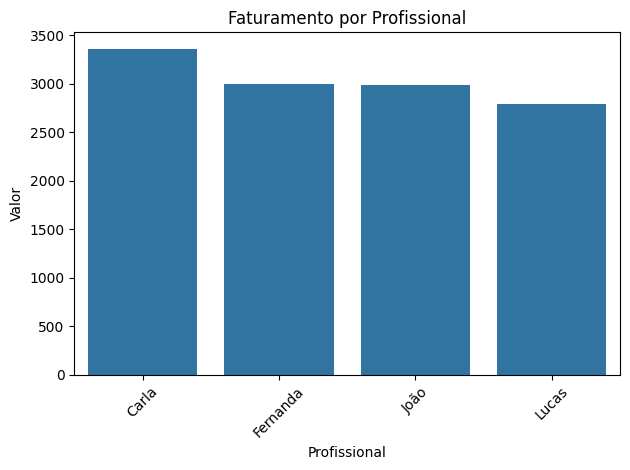

In [100]:
faturamento_profissional_df = df_salao.groupby('Profissional')['Valor'].sum().reset_index()
faturamento_profissional_df = faturamento_profissional_df.sort_values(by='Valor', ascending=False)
display(faturamento_profissional_df)

sns.barplot(data=faturamento_profissional_df, x='Profissional', y='Valor')
plt.title('Faturamento por Profissional')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4.5 Receita por dia da semana
> Em quais dias da semana o salão fatura mais? Algum dia tem pouco movimento?

,Dia Semana,Quantidade
0,Sexta-feira,33
1,Quarta-feira,31
2,Domingo,31
3,Sábado,28
4,Terça-feira,28
5,Segunda-feira,26
6,Quinta-feira,23


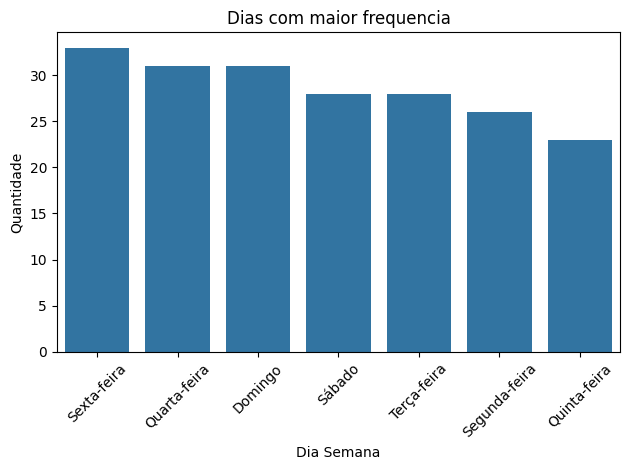

In [ ]:
dias_populares_df = df_salao['Dia'].value_counts().reset_index()
dias_populares_df.columns = ['Dia Semana', 'Quantidade']
display(dias_populares_df)

sns.barplot(data=dias_populares_df, x="Dia Semana", y="Quantidade")
plt.title('Dias da semana com mais atendimentos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4.6 Ticket médio por cliente
> Qual é o valor médio gasto por cliente?

Ticket médio é de: R$60.70


,Profissional,Valor
0,Carla,67.245000
1,Fernanda,55.477407
2,João,63.647234
3,Lucas,56.935510


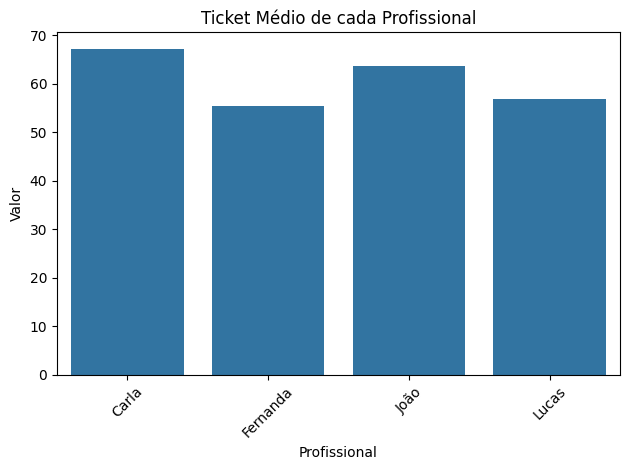

In [94]:
ticket_medio = df_salao['Valor'].mean() 
print(f'Ticket médio é de: R${ticket_medio:.2f}')

ticket_medio_profissional = df_salao.groupby('Profissional')['Valor'].mean().reset_index()
display(ticket_medio_profissional)

sns.barplot(data=ticket_medio_profissional, x="Profissional", y="Valor")
plt.title('Ticket Médio de cada Profissional')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4.7 Distribuição das formas de pagamento
> Como os clientes preferem pagar? Existe um método predominante?

,Forma de Pagamento,Quantidade
0,Dinheiro,70
1,Pix,69
2,Cartão,61


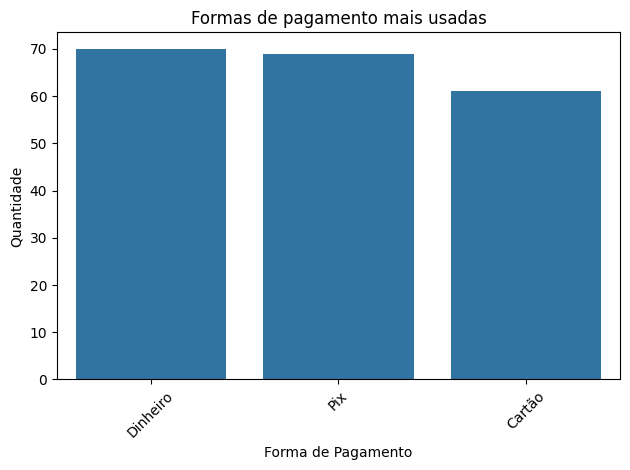

In [92]:
pagamentos_populares_df = df_salao['Forma de Pagamento'].value_counts().reset_index()
pagamentos_populares_df.columns = ['Forma de Pagamento', 'Quantidade']
display(pagamentos_populares_df)

sns.barplot(data=pagamentos_populares_df, x="Forma de Pagamento", y="Quantidade")
plt.title('Formas de pagamento mais usadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 4.8 Evolução de faturamento ao longo do tempo
> Mostre como a receita evoluiu com o tempo (linha do tempo por mês, por exemplo)

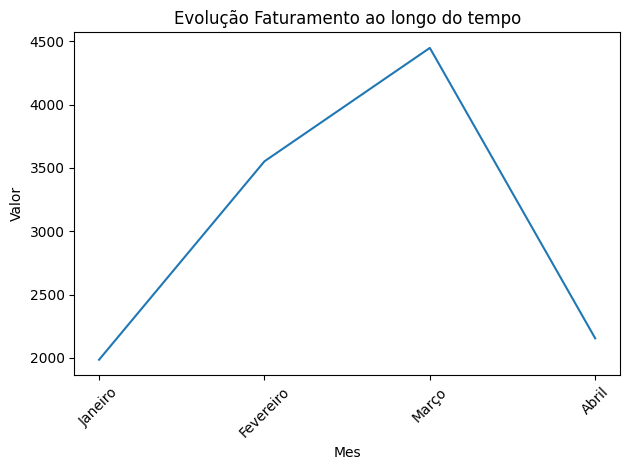

In [65]:
evolucao_faturamento = df_salao.groupby(['Mes_Num','Mes'])['Valor'].sum().reset_index()
evolucao_faturamento = evolucao_faturamento.sort_values('Mes_Num')

sns.lineplot(data=evolucao_faturamento, x="Mes", y="Valor")
plt.title('Evolução Faturamento ao longo do tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Conclusões e Recomendações
> Escreva um resumo das descobertas:
> - O que está funcionando bem no salão?
> - Há oportunidades de melhorar algum aspecto?
> - Alguma recomendação estratégica?

🧠 Conclusões e Recomendações
💰 Faturamento
O salão teve um faturamento total de R$ 12.139,29 no período analisado.
O mês com maior receita foi março, o que pode indicar um pico sazonal ou boas estratégias aplicadas nesse período.

Recomendação: revisar ações realizadas em março (promoções, datas comemorativas, divulgação) e considerar replicá-las em meses com menor desempenho.

✂️ Serviços
O serviço mais realizado foi Corte Feminino, seguido por Escova.
Esses dois serviços concentram grande parte da demanda e são essenciais para o movimento do salão.

Recomendação: manter o foco nesses serviços com combos, fidelização e ofertas relacionadas. Treinar equipe para agilidade e excelência nesses atendimentos.

👥 Profissionais
Fernanda foi a profissional com mais atendimentos, indicando destaque em volume de agendamentos e/ou preferência de clientes.

Recomendação: verificar a agenda da Fernanda e avaliar oportunidades para distribuir melhor a demanda ou utilizar a reputação dela em estratégias de marketing.

📆 Dias da Semana
O dia com mais movimento foi sexta-feira, enquanto quinta-feira teve o menor volume de atendimentos.

Recomendação: criar ações específicas para aumentar o fluxo nas quintas-feiras (ex: descontos, bônus, divulgação segmentada).

💳 Formas de Pagamento
A forma de pagamento mais usada foi dinheiro, o que pode ser vantajoso por evitar taxas, mas também exige atenção no controle de caixa.

Recomendação: manter diversidade nas opções de pagamento, mas considerar incentivos para meios com menor custo (como Pix, por exemplo).

🎟️ Ticket Médio
O ticket médio foi de R$ 60,70, um valor saudável considerando os serviços oferecidos.

Recomendação: trabalhar vendas adicionais (como hidratação, sobrancelha, manicure junto) para aumentar gradativamente o ticket médio por cliente.

### 6. Próximos passos possíveis (bônus)
> Sugira o que poderia ser feito com mais dados:
> - Análise de agendamentos
> - Comparação entre filiais
> - Previsão de demanda

💰 Faturamento
Durante o período analisado, o salão gerou um faturamento total de R$ 12.139,29.
A distribuição mensal mostra uma tendência de estabilidade com variações pontuais — provavelmente ligadas a finais de semana e sazonalidade.

Recomendação: observar os dias e semanas de maior movimento e buscar replicar essas estratégias (promoções, reforço de equipe, divulgação) em períodos mais fracos.

✂️ Serviços
Os dois serviços mais realizados foram Corte Feminino e Escova, confirmando uma demanda recorrente por esses procedimentos.

Recomendação: investir em combos e promoções que combinem esses serviços com outros complementares, como hidratação ou sobrancelha, para aumentar o ticket médio.

👩‍🎨 Profissionais
Os profissionais têm ticket médio bem equilibrado, variando entre:

Carla: R$ 67,24

João: R$ 63,65

Lucas: R$ 56,94

Fernanda: R$ 55,48

Essa consistência é excelente e mostra um bom padrão de entrega e precificação.

Recomendação: manter esse equilíbrio e incentivar práticas de up-selling para todos os profissionais com base no estilo de atendimento de Carla, que tem o maior ticket.

📆 Dias da Semana
Os dias de maior movimento foram sexta-feira e domingo, enquanto quinta-feira foi o mais fraco.

Recomendação: considerar ações promocionais em quintas para redistribuir a demanda da semana, como “quinta da beleza” com descontos ou bônus.

💳 Formas de Pagamento
A forma mais utilizada foi o dinheiro, o que pode ser vantajoso pelo não pagamento de taxas, mas exige controle de caixa mais rigoroso.

Recomendação: continuar aceitando múltiplas formas de pagamento, mas avaliar custos com maquininhas e incentivar uso de Pix, que tem taxa zero.

🎟️ Ticket Médio
O ticket médio geral foi de R$ 60,70, o que indica um bom equilíbrio entre volume de clientes e preços praticados.

Recomendação: trabalhar com pacotes, tratamentos complementares e promoções combinadas para elevar esse valor ao longo do tempo.